# k-최근접 이웃 회귀

분류: 샘플을 여러 개의 클래스 중 하나로 분류하는 문제

회귀: 임의의 어떤 숫자를 예측하는 문제

## k-최근접 이웃 회귀(k-neighbors regression)

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

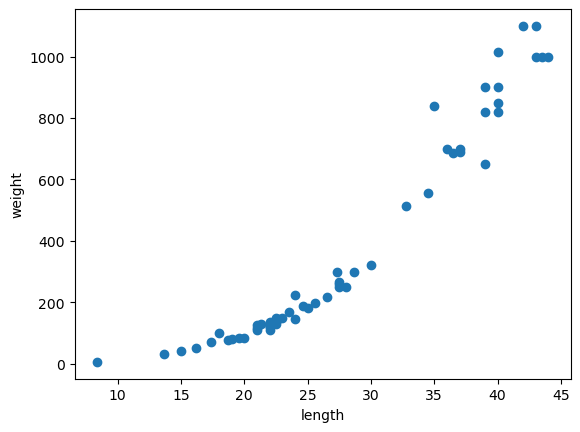

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

~~~.reshape(m, n): 배열의 크기를 m x n으로 지정하는 함수

In [5]:
train_input = train_input.reshape(-1, 1) # 원소개수 x 1로 배열 변경 -> sklearn은 2차원 배열로 훈련시켜야 함.
test_input = test_input.reshape(-1, 1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

## 결정계수($R^2$)

In [7]:
print(knr.score(test_input, test_target))

0.992809406101064


결정계수(coefficient of determination): 예측이 실제와 가까운 정도 -> $R^2$

In [8]:
from sklearn.metrics import mean_absolute_error

In [9]:
test_prediction = knr.predict(test_input) # 예측 만들기
mae = mean_absolute_error(test_target, test_prediction) # 예측과의 절댓값 오차 반환
print(mae)

19.157142857142862


타깃과 평균 19g정도 다르다는 의미.

In [10]:
print(knr.score(train_input, train_target))

0.9698823289099254


## 과대, 과소적합

과대적합(overfitting): train set에만 잘 맞는 모델로, train set의 점수보다 test set의 점수가 현격히 낮은 경우

과소적합(underfitting): train set보다 test set의 점수가 높거나 두 점수가 모두 낮은 경우 -> 너무 단순한 train set, 크기가 작은 set

In [11]:
knr.n_neighbors = 3 # 모델을 좀 더 복잡하게 만들기

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


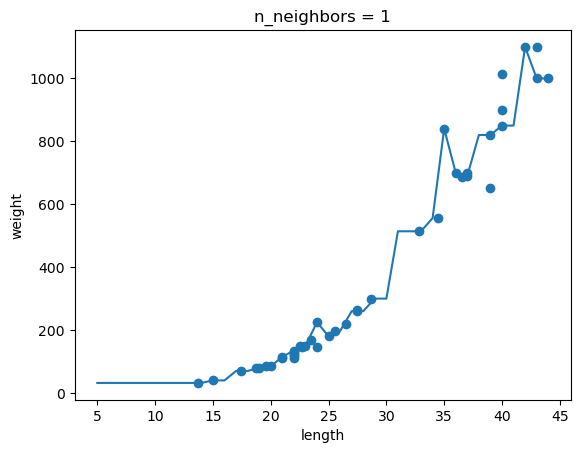

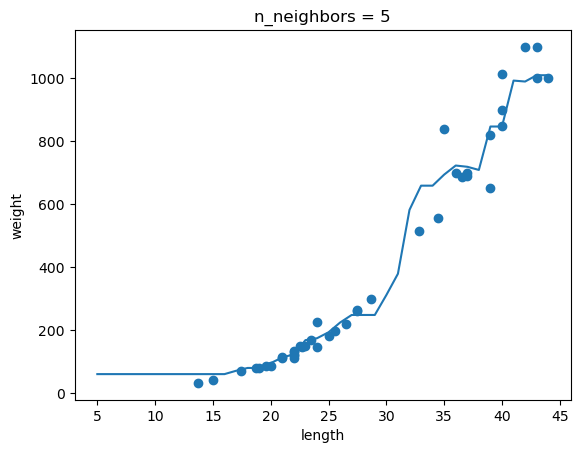

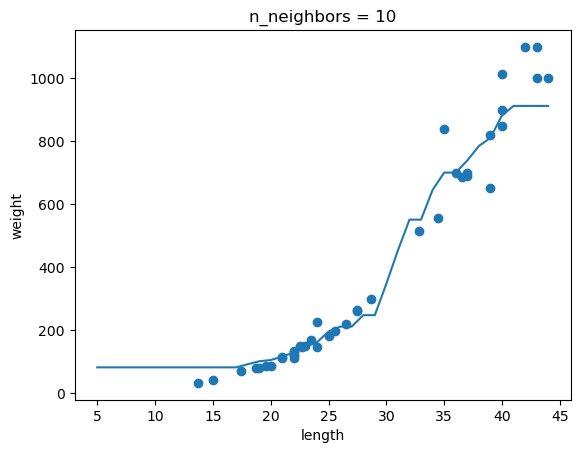

In [12]:
# 실전문제

knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)
for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title("n_neighbors = {}".format(n))
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.show()

# 선형 회귀

In [13]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [14]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [15]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [16]:
from sklearn import neighbors

knr = neighbors.KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


k-최근접 이웃은 평균을 예측하기에, train set의 범위를 벗어나면 엉뚱한 값 예측

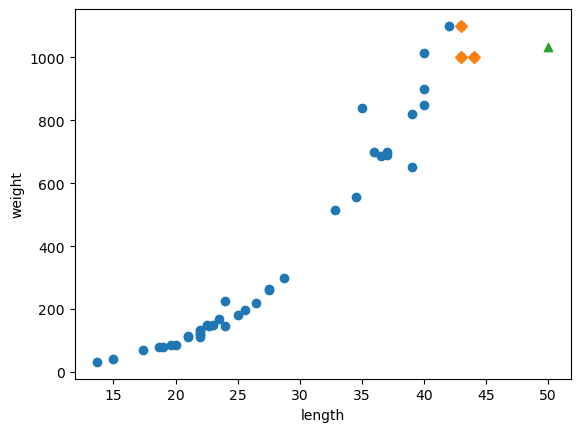

In [17]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")

plt.scatter(50, 1033, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [18]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [19]:
print(knr.predict([[100]]))

[1033.33333333]


## 선형회귀

선형회귀(Linear Regression): 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

In [20]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [21]:
print(lr.coef_, lr.intercept_) # ax + b에서 x의 계수인 a와 y절편인 b 구하는 함수

[39.01714496] -709.0186449535477


model parameter: 머신러닝 알고리즘이 찾은 값

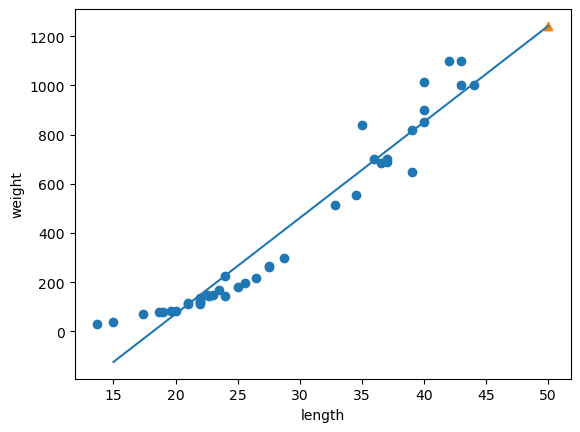

In [22]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [23]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


## 다항 회귀

In [24]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [25]:
lr = linear_model.LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [26]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


다항 회귀(polynomial regression): 다항식을 사용한 회귀

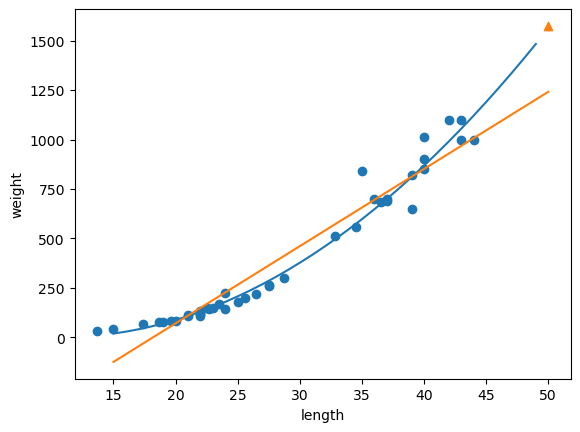

In [27]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)
plt.plot([15, 50], [15 * 39 - 709, 50 * 39 - 709])

plt.scatter(50, 1574, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [28]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


# 특성 공학과 규제

## 다중회귀

다중 회귀(Multiple Regression): 여러 개의 특성을 사용한 선형 회귀

특성 공학(feature engineering): 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [29]:
import pandas as pd
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [30]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [31]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

변환기(transformer): 특성을 만들거나 전처리하기 위한 클래스 -> fit(), transform()

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures() # 특성을 제곱한 항, 서로 곱한 항 추가
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [34]:
poly = PolynomialFeatures(include_bias = False) # 특성에서 1 제거
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [35]:
poly = PolynomialFeatures(include_bias = False) 
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [36]:
poly.get_feature_names_out() # 특성 알아내는 함수

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

## 다중 회귀모델 훈련하기

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [38]:
test_poly = poly.transform(test_input)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594155


In [39]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [40]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [41]:
print(lr.score(test_poly, test_target))

-144.40744532797535


train set이 너무 많아서 과대적합됨

## 규제

규제(regularization): 머신러닝 모델이 train set을 너무 과도하게 학습하지 못하도록 훼방하는 것

선형 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 일

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지(ridge): 계수를 제곱한 값을 기준으로 규제를 적용하는 모델

라쏘(lasso): 계수의 절댓값을 기준으로 규제를 적용하는 모델 -> 계수를 아예 0으로 만들 수 있음.

### 릿지 회귀

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [44]:
print(ridge.score(test_scaled, test_target))

0.979069397761539


alpha 매개변수를 통해 규제의 강도를 조절할 수 있음.

In [45]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [46]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

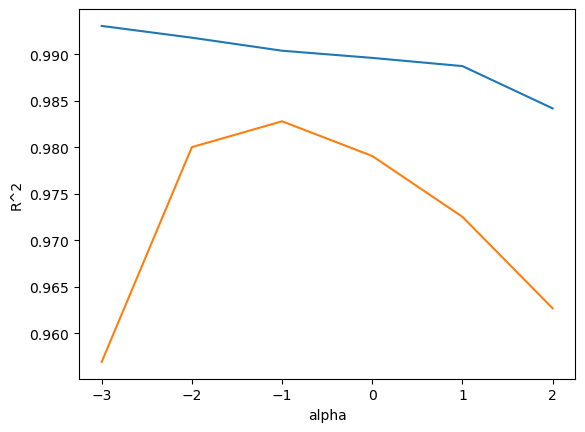

In [47]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

왼쪽은 과대적합, 오른쪽은 과소적합, alpha가 0.1일 때 제일 적합.

In [48]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386954


In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [50]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [51]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    lasso = Lasso(alpha = a, max_iter = 10000) # max_iter은 최적 계수 찾기 위한 계산 반복 횟수
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


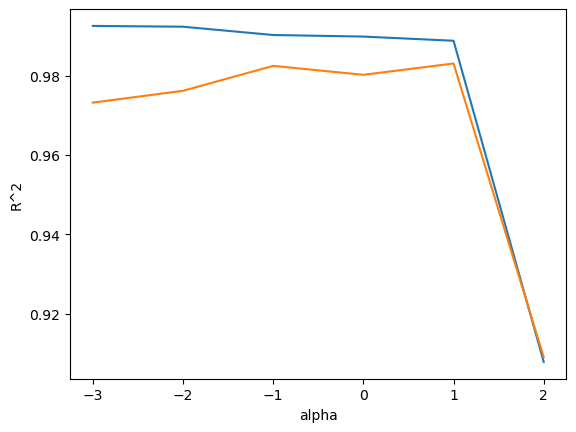

In [52]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [55]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [56]:
print(np.sum(lasso.coef_ == 0))

40
